In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
pd.set_option("display.max_columns", 500)
train_df = pd.read_csv("data2/train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [74]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [75]:
train_df.describe(include="object").T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


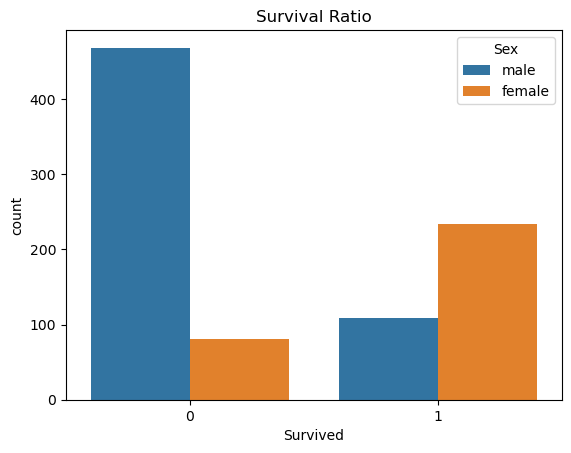

In [76]:
plt.title("Survival Ratio")
sns.countplot(data=train_df, x="Survived", hue="Sex");

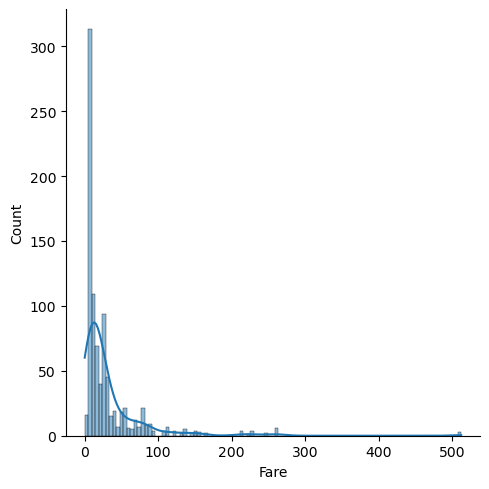

In [77]:
sns.displot(data=train_df, x="Fare", kde=True);

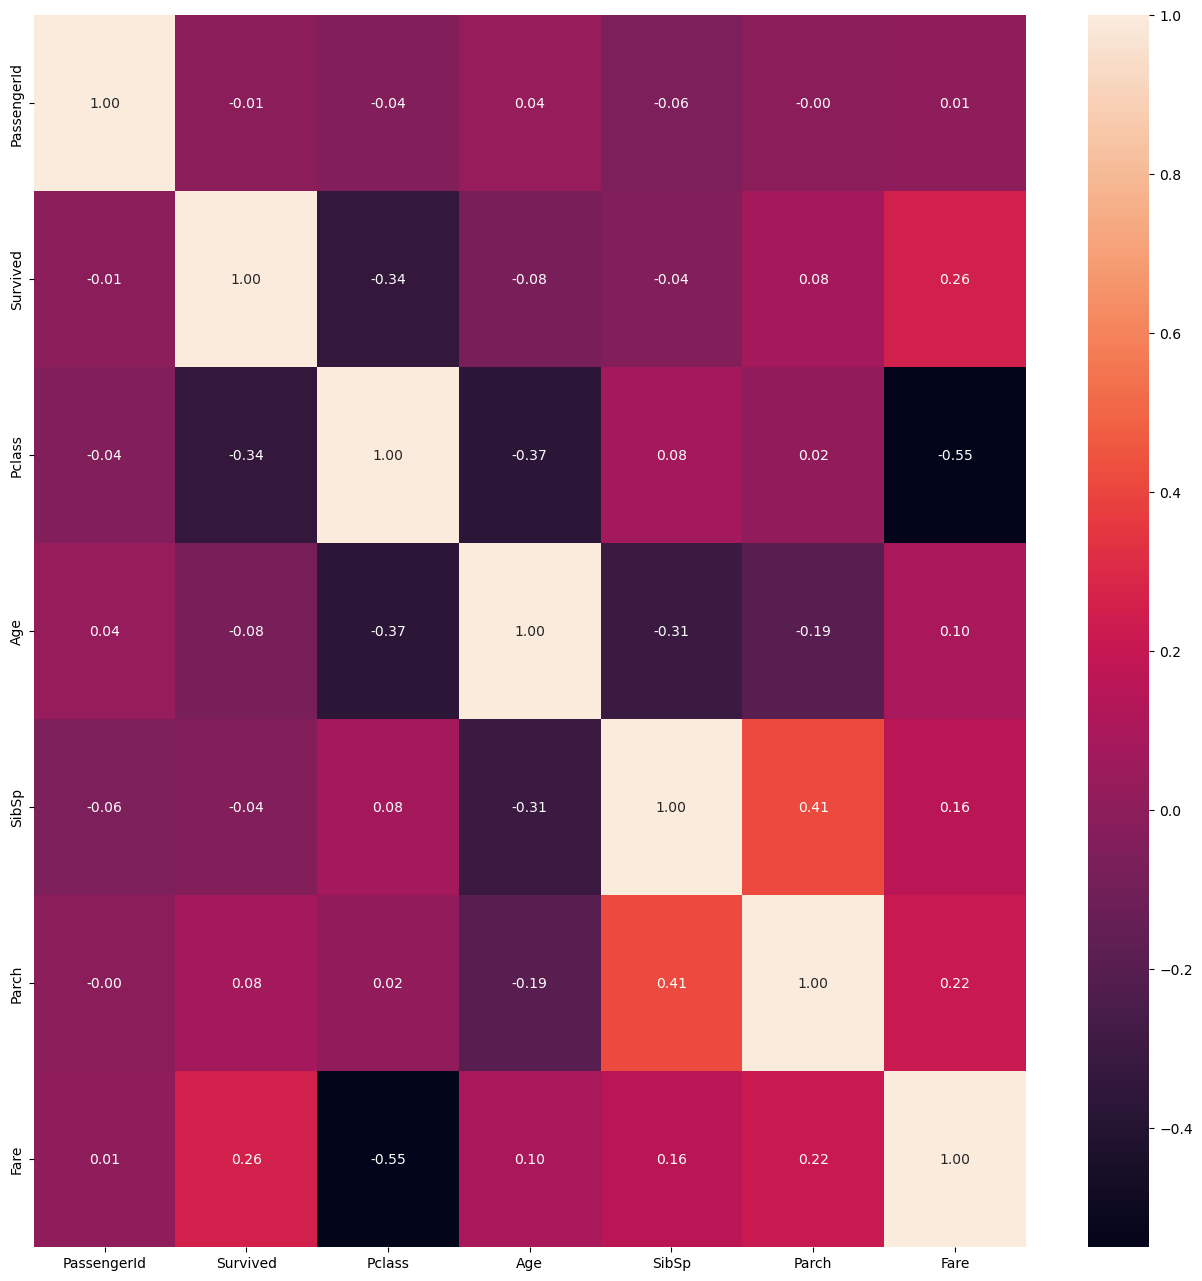

In [78]:
corr_mat = train_df.corr(numeric_only=True)

plt.figure(figsize=(16, 16))
sns.heatmap(corr_mat, annot=True, fmt=".2f");

Pclass and Fare seem to be correlated (higher than the rest).<br>
It makes total sense

In [79]:
# the smaller the number, the more elite class it represents
train_df["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

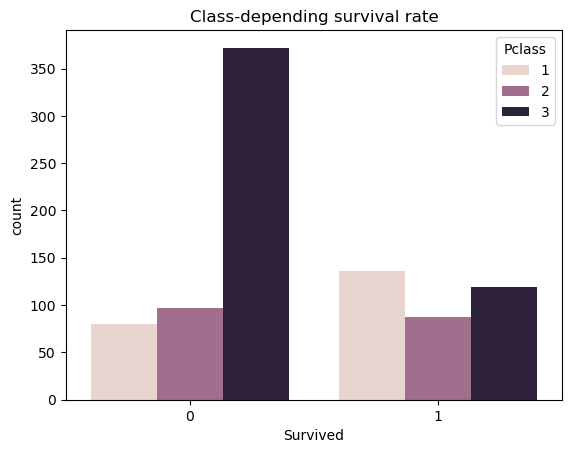

In [80]:
plt.title("Class-depending survival rate")
sns.countplot(data=train_df, x="Survived", hue="Pclass");

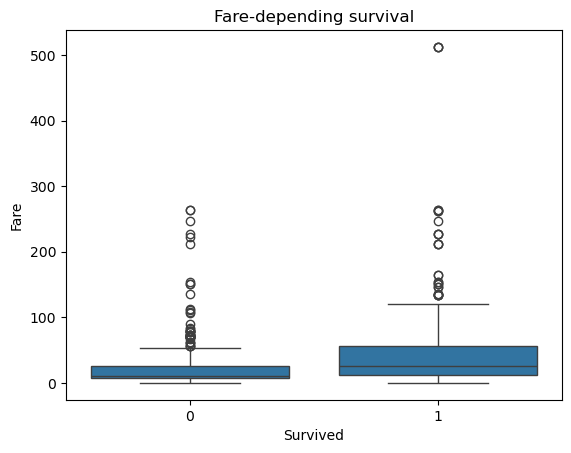

In [81]:
plt.title("Fare-depending survival")
sns.boxplot(data=train_df, x="Survived", y="Fare");

In [82]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [83]:
# Low-quality features
drop_feats = ["PassengerId", "Name", "SibSp", "Cabin", "Ticket"]

In [84]:
train_df.drop(drop_feats, axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,male,22.0,0,7.2500,S
1,1,1,female,38.0,0,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,0,53.1000,S
4,0,3,male,35.0,0,8.0500,S


**Preprocessing**

In [85]:
train_df.shape

(891, 7)

In [86]:
X, y = train_df.drop("Survived", axis=1), train_df["Survived"]

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [88]:
X

,Pclass,Sex,Age,Parch,Fare,Embarked
0,3,male,22.0,0,7.2500,S
1,1,female,38.0,0,71.2833,C
2,3,female,26.0,0,7.9250,S
3,1,female,35.0,0,53.1000,S
4,3,male,35.0,0,8.0500,S
...,...,...,...,...,...,...
886,2,male,27.0,0,13.0000,S
887,1,female,19.0,0,30.0000,S
888,3,female,NaN,2,23.4500,S
889,1,male,26.0,0,30.0000,C


In [89]:
train_df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [90]:
X.isna().sum()

Pclass        0
Sex           0
Age         177
Parch         0
Fare          0
Embarked      2
dtype: int64

In [91]:
num_imputer = SimpleImputer(strategy="mean")
cat_imputer = SimpleImputer(strategy="most_frequent")

In [92]:
num_feats = list(X.select_dtypes("number"))
cat_feats = list(X.select_dtypes("object"))

In [93]:
num_pipeline = Pipeline(steps=[
    ("num_imp", num_imputer),
    ("num_scaler", StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ("cat_imp", cat_imputer),
    ("cat_enc", OneHotEncoder())
])

pipeline = ColumnTransformer(transformers=[
    ("num", num_pipeline, num_feats),
    ("cat", cat_pipeline, cat_feats)
], remainder="passthrough")

In [94]:
X_transformed = pipeline.fit_transform(X)
X_transformed.shape

(891, 9)

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_val, y_train, y_val = train_test_split(X_transformed, y, test_size=0.2)

In [97]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((712, 9), (179, 9), (712,), (179,))

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [100]:
from sklearn.metrics import accuracy_score

In [101]:
y_pred = model.predict(X_val)
accuracy_score(y_val, y_pred)

0.7932960893854749

In [102]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

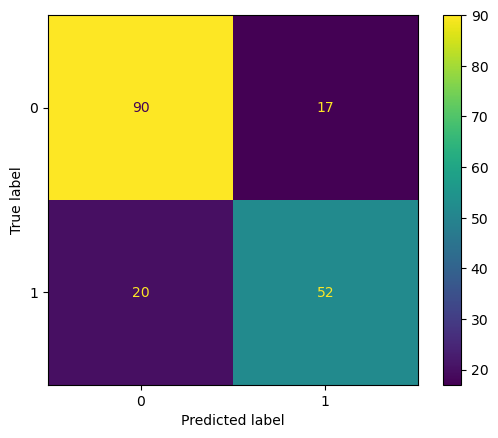

In [103]:
cm = confusion_matrix(y_val, y_pred)
dp = ConfusionMatrixDisplay(cm)
dp.plot();

In [104]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [105]:
print(precision_score(y_val, y_pred), recall_score(y_val, y_pred), f1_score(y_val, y_pred))

0.7536231884057971 0.7222222222222222 0.7375886524822695


In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [108]:
y_pred = model2.predict(X_val)
accuracy_score(y_val, y_pred)

0.7988826815642458

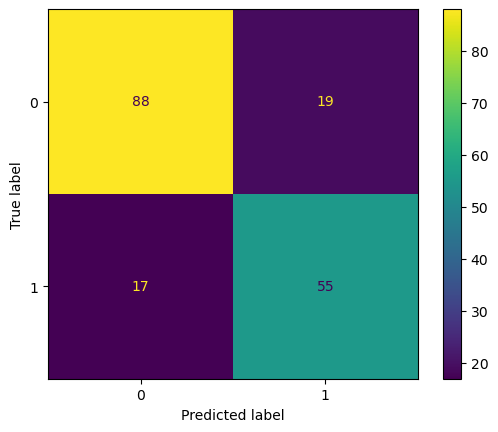

In [109]:
cm = confusion_matrix(y_val, y_pred)
dp = ConfusionMatrixDisplay(cm)
dp.plot();

In [110]:
precision_score(y_val, y_pred), recall_score(y_val, y_pred), f1_score(y_val, y_pred)

(0.7432432432432432, 0.7638888888888888, 0.7534246575342466)

In [111]:
X_transformed.shape, y.shape

((891, 9), (891,))

In [112]:
from sklearn.model_selection import cross_val_predict

In [113]:
probas = cross_val_predict(model2, X_transformed, y, cv=5, n_jobs=-1, method="predict_proba")
pos_probas = probas[:, 1]

In [114]:
from sklearn.metrics import precision_recall_curve

In [115]:
precisions, recalls, thresholds = precision_recall_curve(y, pos_probas)

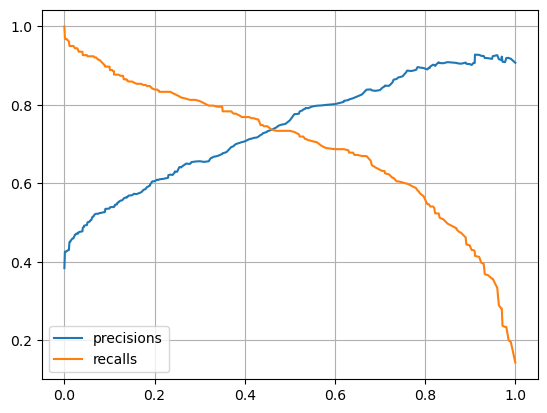

In [116]:
plt.plot(thresholds, precisions[:-1], label="precisions")
plt.plot(thresholds, recalls[:-1], label="recalls")
plt.grid()
plt.legend()
plt.show();

Well... Default decision boundary of 0.5 is good enough. It looks like 0.45 is slightly better

In [117]:
pos_probas = model2.predict_proba(X_val)[:, 1]
y_pred_imp = pos_probas >= 0.45
accuracy_score(y_val, y_pred_imp)

0.7877094972067039

In [118]:
from sklearn.ensemble import StackingClassifier

In [119]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [120]:
model1 = RandomForestClassifier()
model2 = SVC()
model3 = DecisionTreeClassifier()

stacked_model = StackingClassifier(estimators=[
    ("model1", model1),
    ("model2", model2),
    ("model3", model3)
])

stacked_model.fit(X_train, y_train)

,estimators,"[('model1', ...), ('model2', ...), ...]"
,final_estimator,None
,cv,None
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2


In [121]:
pred = stacked_model.predict(X_val)
accuracy_score(y_val, pred)

0.8212290502793296

In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
forest_grid = {
    "max_depth": (4, 6, 8),
    "n_estimators": (500, 600, 700),
    "min_samples_leaf": (10, 20)
}


grid_search_rf = GridSearchCV(model1, forest_grid, scoring="accuracy", cv=3, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'max_depth': (4, ...), 'min_samples_leaf': (10, ...), 'n_estimators': (500, ...)}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,700


In [124]:
grid_search_rf.best_score_

0.8089564939900011

In [125]:
model1 = grid_search_rf.best_estimator_

In [126]:
svc_grid = [
    {"kernel": ("poly",),
     "degree": (2, 3, 4)},
    {"kernel": ("rbf", "linear")}
]

grid_search_svc = GridSearchCV(model2, param_grid=svc_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid_search_svc.fit(X_train, y_train),
grid_search_svc.best_score_

0.8146001016440332

In [127]:
model2 = grid_search_svc.best_estimator_

In [128]:
tree_grid = {
    "max_depth": (None, 6, 8, 12)
}

grid_search_tree = GridSearchCV(model3, tree_grid, scoring="accuracy", n_jobs=-1)
grid_search_tree.fit(X_train, y_train)
grid_search_tree.best_score_

0.8300305328474342

In [129]:
model3 = grid_search_tree.best_estimator_

In [130]:
stacked_model = StackingClassifier(estimators=[
    ("model1", model1),
    ("model2", model2),
    ("model3", model3)
])

stacked_model.fit(X_train, y_train)

,estimators,"[('model1', ...), ('model2', ...), ...]"
,final_estimator,None
,cv,None
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,n_estimators,700
,criterion,'gini'
,max_depth,6
,min_samples_split,2


In [131]:
stacked_preds = stacked_model.predict(X_val)
accuracy_score(y_val, stacked_preds)

0.8268156424581006

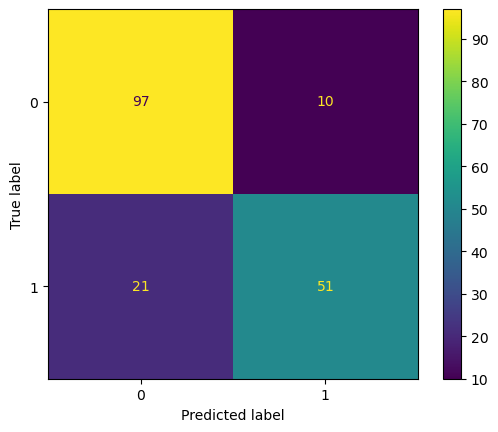

In [133]:
cm = confusion_matrix(y_val, stacked_preds)
disp = ConfusionMatrixDisplay(cm)
disp.plot();

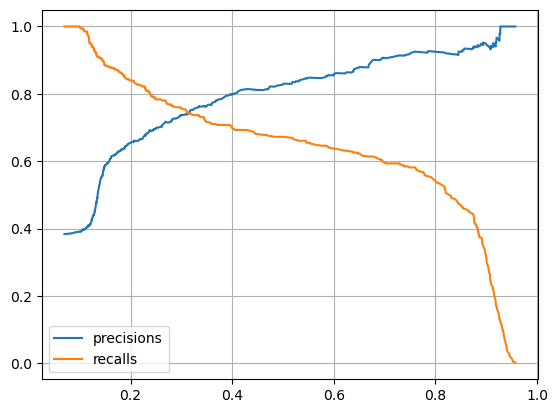

In [134]:
probas = cross_val_predict(stacked_model, X_transformed, y, cv=5, n_jobs=-1, method="predict_proba")
pos_probas = probas[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y, pos_probas)
plt.plot(thresholds, precisions[:-1], label="precisions")
plt.plot(thresholds, recalls[:-1], label="recalls")
plt.grid()
plt.legend()
plt.show();

In [135]:
pos_probas = stacked_model.predict_proba(X_val)[:, 1]
y_pred_imp = pos_probas >= 0.3
accuracy_score(y_val, y_pred_imp)

0.7988826815642458